## Analizador Léxico
Su función es analizar una secuencia de caracteres para convertirla en una secuencia de tokens

In [15]:
from enum import Enum

# Definición de tipos de token

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [16]:
from typing import List, Dict

# Clase Nodo para el árbol de expresiones

class NodoExpresion:
    def __init__(self, valor: str, tipo: TipoToken):
        self.valor = valor
        self.tipo = tipo
        self.izquierda = None
        self.derecha = None

In [17]:
# Función para el analizador léxico

def analizador_lexico(entrada: str) -> List[Dict]:

    # Separar cadena en palabras

    tokens = entrada.lower().split()
    
    # Etiquetar cada palabra con su respectivo tipo de token
    
    lexemas = []
    for token in tokens:
        if token == 'o':
            lexemas.append({"valor": token, "tipo": TipoToken.O})
        elif token == 'y':
            lexemas.append({"valor": token, "tipo": TipoToken.Y})
        elif token == 'si':
            lexemas.append({"valor": token, "tipo": TipoToken.S})
        elif token == 'entonces':
            lexemas.append({"valor": token, "tipo": TipoToken.E})
        elif token == 'no':
            lexemas.append({"valor": token, "tipo": TipoToken.N})
        else:
            lexemas.append({"valor": token, "tipo": TipoToken.P})
            
    return lexemas

## Analizador sintáctico
Analiza la estructura sintáctica del código fuente para determinar si está correctamente

In [18]:
# Definición de estados del analizador sintáctico

class EstadosAnalizador(Enum):
    INICIO = 1
    CONDICIONAL = 2
    PRECEDENTE = 3
    ERROR = 4
    NEGACION_i = 5
    NEGACION_f = 6
    NEGACION_s = 7
    CONECTOR = 8
    ATOMO = 9
    DISYUNCION = 10
    ATOMOF = 11
    CONJUNCION = 12
    FIN = 13  # Estado final

In [19]:
# Función para el analizador sintáctico

def analizador_sintactico(lexemas: List[Dict], reglas_simbolos: List[List[Dict]]) -> EstadosAnalizador:
    EstadoActual = EstadosAnalizador.INICIO
    lista_atomos = []
    atomo_temporal = []
    lexema_anterior = ""

    for l in lexemas:
        lexema = l["valor"]
        
        # Estado INICIO

        if EstadoActual == EstadosAnalizador.INICIO:
            if lexema == "si":
                EstadoActual = EstadosAnalizador.CONDICIONAL
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_i
            elif lexema in ["y", "o", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado NEGACION_i

        elif EstadoActual == EstadosAnalizador.NEGACION_i:
            if lexema in ["si", "y", "o", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado ATOMO

        elif EstadoActual == EstadosAnalizador.ATOMO:
            atomo_temporal.append(l)
            if lexema in ["no", "entonces", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema in ["y", "o"]:
                EstadoActual = EstadosAnalizador.CONECTOR
            else:
                EstadoActual = EstadosAnalizador.ATOMO
        
        # Estado CONDICIONAL

        elif EstadoActual == EstadosAnalizador.CONDICIONAL:
            if lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_s
            elif lexema in ["entonces", "y", "o", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado NEGACION_s

        elif EstadoActual == EstadosAnalizador.NEGACION_s:
            if lexema in ["y", "o", "entonces", "si", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado PRECEDENTE

        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            if lexema == "entonces":
                EstadoActual = EstadosAnalizador.CONECTOR
            elif lexema in ["no", "y", "o", "si"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.PRECEDENTE
        
        # Estado CONECTOR

        elif EstadoActual == EstadosAnalizador.CONECTOR:
            if lexema in ["y", "o", "si", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado NEGACION_f

        elif EstadoActual == EstadosAnalizador.NEGACION_f:
            if lexema in ["y", "o", "si", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado CONJUNCION

        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            if lexema in ["entonces", "si", "o", "y"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado DISYUNCION

        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            if lexema in ["y", "o", "si", "entonces"]:
                EstadoActual = EstadosAnalizador.ERROR
            elif lexema == "no":
                EstadoActual = EstadosAnalizador.NEGACION_f
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        # Estado ATOMOF

        elif EstadoActual == EstadosAnalizador.ATOMOF:
            if lexema in ["y", "o", "si", "entonces", "no"]:
                EstadoActual = EstadosAnalizador.ERROR
            else:
                EstadoActual = EstadosAnalizador.ATOMOF
        
        elif EstadoActual == EstadosAnalizador.ERROR:
            print("Tu proposición está mal escrita")
            break
    
    if EstadoActual == EstadosAnalizador.ATOMOF:
        return EstadosAnalizador.FIN
    else:
        return EstadosAnalizador.ERROR

## Analizador semántico
Comprueba reglas adicionales que no son posibles de verificar en la etapa léxica o sintáctica

In [20]:
# Función para el analizador semántico

def analizador_semantico(lexemas: list) -> bool:

    tiene_si = False
    tiene_entonces = False
    tiene_conector = False
    tiene_negacion = False

    for lexema in lexemas:
        tipo = lexema["tipo"]
        
        if tipo == TipoToken.S:
            tiene_si = True
        elif tipo == TipoToken.E:
            tiene_entonces = True
        elif tipo in [TipoToken.O, TipoToken.Y]:
            tiene_conector = True
        elif tipo == TipoToken.N:
            tiene_negacion = True
    return tiene_si and tiene_entonces and (not tiene_conector or any(lexema["tipo"] == TipoToken.P for lexema in lexemas))

## Lector de reglas

In [21]:
# Función para leer las reglas desde un archivo

def leer_reglas(nombre_archivo: str) -> list:
    try:
        with open(nombre_archivo, 'r') as file:
            reglas = file.readlines()
        return [regla.strip() for regla in reglas if regla.strip()]
    except FileNotFoundError:
        print(f"Error: El archivo '{nombre_archivo}' no se encuentra.")
        raise
    except IOError as e:
        print(f"Error al leer el archivo '{nombre_archivo}': {e}")
        raise

In [22]:
# Leer las reglas desde el archivo

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    print("Reglas leídas del archivo:")
    for regla in reglas:
        print(regla)
except Exception as e:
    print(e)

Reglas leídas del archivo:
Si el Volkswagen Golf tiene mas de 200 hp, entonces es considerado de alto rendimiento.
Si el Volkswagen Polo tiene menos de 180 hp, entonces es considerado de bajo rendimiento.
Si el Volkswagen Passat tiene al menos 3 aÃ±os de antigÃ¼edad, entonces es usado.
Si el Volkswagen Tiguan tiene menos de 3 aÃ±os de antigÃ¼edad, entonces es nuevo.
Si el Volkswagen Arteon tiene menos de 500 km recorridos, entonces es casi nuevo.
Si el Volkswagen T-Roc tiene entre 500 y 1000 km recorridos, entonces es seminuevo.
Si el Volkswagen Touareg tiene mÃ¡s de 1000 km recorridos, entonces es usado.
Si el Volkswagen Golf GTI es deportivo y tiene mÃ¡s de 500 hp, entonces es de alto rendimiento.
Si el Volkswagen Scirocco es deportivo y tiene menos de 500 hp, entonces es de bajo rendimiento.
Si el Volkswagen Golf R es deportivo y tiene mÃ¡s de 1000 hp, entonces es de alto rendimiento.


## Convertir reglas a símbolo

In [23]:
from typing import List

# Función para convertir las reglas en símbolos para el analizador sintáctico

def convertir_a_simbolos(reglas: List[str], analizador_lexico) -> List[List[dict]]:
   
    reglas_simbolos = []
    for regla in reglas:
        lexemas = analizador_lexico(regla)
        reglas_simbolos.append(lexemas)
    return reglas_simbolos


In [24]:
# Función para construir la tabla de reglas para mostrar

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)
    print("Reglas convertidas a símbolos:")
    for regla_simbolos in reglas_simbolos:
        print(regla_simbolos)
except Exception as e:
    print(e)

Reglas convertidas a símbolos:
[{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'el', 'tipo': <TipoToken.P: 6>}, {'valor': 'volkswagen', 'tipo': <TipoToken.P: 6>}, {'valor': 'golf', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'mas', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '200', 'tipo': <TipoToken.P: 6>}, {'valor': 'hp,', 'tipo': <TipoToken.P: 6>}, {'valor': 'entonces', 'tipo': <TipoToken.E: 5>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'considerado', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'alto', 'tipo': <TipoToken.P: 6>}, {'valor': 'rendimiento.', 'tipo': <TipoToken.P: 6>}]
[{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'el', 'tipo': <TipoToken.P: 6>}, {'valor': 'volkswagen', 'tipo': <TipoToken.P: 6>}, {'valor': 'polo', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'menos', 'tipo': <TipoToken.P: 6>}, {'val

## Generación de tabla

In [25]:
# Función para construir la tabla de reglas para mostrar

def construir_tabla_reglas(reglas_simbolos: list) -> dict:
    tabla_reglas = {}

    for i, regla_simbolos in enumerate(reglas_simbolos, start=1):
        tabla_reglas[f"Regla {i}"] = regla_simbolos

    return tabla_reglas

In [26]:
# Construir la tabla de reglas para mostrar

nombre_archivo = "reglas.txt"
try:
    reglas = leer_reglas(nombre_archivo)
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)
    tabla_reglas = construir_tabla_reglas(reglas_simbolos)
    print("Tabla de reglas:")
    for key, value in tabla_reglas.items():
        print(f"{key}: {value}")
except Exception as e:
    print(e)

Tabla de reglas:
Regla 1: [{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'el', 'tipo': <TipoToken.P: 6>}, {'valor': 'volkswagen', 'tipo': <TipoToken.P: 6>}, {'valor': 'golf', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'mas', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': '200', 'tipo': <TipoToken.P: 6>}, {'valor': 'hp,', 'tipo': <TipoToken.P: 6>}, {'valor': 'entonces', 'tipo': <TipoToken.E: 5>}, {'valor': 'es', 'tipo': <TipoToken.P: 6>}, {'valor': 'considerado', 'tipo': <TipoToken.P: 6>}, {'valor': 'de', 'tipo': <TipoToken.P: 6>}, {'valor': 'alto', 'tipo': <TipoToken.P: 6>}, {'valor': 'rendimiento.', 'tipo': <TipoToken.P: 6>}]
Regla 2: [{'valor': 'si', 'tipo': <TipoToken.S: 3>}, {'valor': 'el', 'tipo': <TipoToken.P: 6>}, {'valor': 'volkswagen', 'tipo': <TipoToken.P: 6>}, {'valor': 'polo', 'tipo': <TipoToken.P: 6>}, {'valor': 'tiene', 'tipo': <TipoToken.P: 6>}, {'valor': 'menos', 'tipo': <TipoToken.P: 6>}, {

## Árbol binario

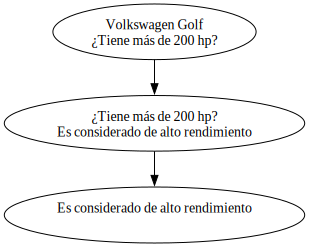

In [27]:
import graphviz
from IPython.display import display

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self):
        self.root = None
        self.node_dict = {}  # Diccionario para almacenar los nodos por valor

    def add_node(self, value, left=None, right=None):
        """Agrega un nuevo nodo al árbol"""
        if value not in self.node_dict:
            self.node_dict[value] = Node(value)
        node = self.node_dict[value]

        if self.root is None:
            self.root = node

        if left:
            if left not in self.node_dict:
                self.node_dict[left] = Node(left)
            node.left = self.node_dict[left]

        if right:
            if right not in self.node_dict:
                self.node_dict[right] = Node(right)
            node.right = self.node_dict[right]

    def bfs(self):
        """Recorre el árbol en anchura"""
        if self.root is None:
            return []

        result = []
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            result.append(node)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        return result

    def dfs(self):
        """Recorre el árbol en profundidad"""
        if self.root is None:
            return []

        def dfs_recursive(node, result):
            if node:
                result.append(node)
                dfs_recursive(node.left, result)
                dfs_recursive(node.right, result)

        result = []
        dfs_recursive(self.root, result)
        return result

def visualize_tree(tree, filename=None):
    dot = graphviz.Digraph(format='png')

    def traverse(node, parent=None):
        dot.node(str(id(node)), f'{node.value}\n{node.left.value if node.left else ""}\n{node.right.value if node.right else ""}')
        if parent is not None:
            dot.edge(str(id(parent)), str(id(node)))
        if node.left:
            traverse(node.left, node)
        if node.right:
            traverse(node.right, node)

    traverse(tree.root)
    if filename:
        dot.render(filename, format='png')
    display(dot)

def build_tree_volkswagen():
    tree = BinaryTree()

    # Primer nivel de decisiones basadas en el modelo
    tree.add_node('Volkswagen Golf', '¿Tiene más de 200 hp?', None)
    tree.add_node('Volkswagen Polo', '¿Tiene menos de 180 hp?', None)
    tree.add_node('Volkswagen Passat', '¿Tiene al menos 3 años de antigüedad?', None)
    tree.add_node('Volkswagen Tiguan', '¿Tiene menos de 3 años de antigüedad?', None)
    tree.add_node('Volkswagen Arteon', '¿Tiene menos de 500 km recorridos?', None)
    tree.add_node('Volkswagen T-Roc', '¿Tiene entre 500 y 1000 km recorridos?', None)
    tree.add_node('Volkswagen Touareg', '¿Tiene más de 1000 km recorridos?', None)
    tree.add_node('Volkswagen Golf GTI', '¿Es deportivo y tiene más de 500 hp?', None)
    tree.add_node('Volkswagen Scirocco', '¿Es deportivo y tiene menos de 500 hp?', None)
    tree.add_node('Volkswagen Golf R', '¿Es deportivo y tiene más de 1000 hp?', None)

    # Segundo nivel de decisiones basadas en potencia y deportividad
    tree.add_node('¿Tiene más de 200 hp?', 'Es considerado de alto rendimiento', None)
    tree.add_node('¿Tiene menos de 180 hp?', 'Es considerado de bajo rendimiento', None)
    tree.add_node('¿Tiene al menos 3 años de antigüedad?', 'Es usado', None)
    tree.add_node('¿Tiene menos de 3 años de antigüedad?', 'Es nuevo', None)
    tree.add_node('¿Tiene menos de 500 km recorridos?', 'Es casi nuevo', None)
    tree.add_node('¿Tiene entre 500 y 1000 km recorridos?', 'Es seminuevo', None)
    tree.add_node('¿Tiene más de 1000 km recorridos?', 'Es usado', None)
    tree.add_node('¿Es deportivo y tiene más de 500 hp?', 'Es de alto rendimiento', None)
    tree.add_node('¿Es deportivo y tiene menos de 500 hp?', 'Es de bajo rendimiento', None)
    tree.add_node('¿Es deportivo y tiene más de 1000 hp?', 'Es de alto rendimiento', None)

    return tree

# Crear y visualizar el árbol de Volkswagen
tree_volkswagen = build_tree_volkswagen()
visualize_tree(tree_volkswagen, 'tree_volkswagen.png')





In [28]:
# Función para construir árbol de expresiones
def construir_arbol_expresion(lexemas: List[Dict]) -> ArbolBinario:
    if not lexemas:
        return ArbolBinario()
    
    arbol = ArbolBinario()
    raiz = NodoExpresion(lexemas[0]["valor"], lexemas[0]["tipo"])
    arbol.insertar(raiz)
    pila = [raiz]
    idx = 1

    while pila and idx < len(lexemas):
        nodo_actual = pila.pop()

        if nodo_actual.tipo in [TipoToken.Y, TipoToken.O]:
            nodo_actual.izquierda = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
            arbol.insertar(nodo_actual.izquierda)
            pila.append(nodo_actual.izquierda)
            idx += 1

            if idx < len(lexemas) and lexemas[idx]["tipo"] in [TipoToken.P, TipoToken.S, TipoToken.N]:
                nodo_actual.derecha = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
                arbol.insertar(nodo_actual.derecha)
                pila.append(nodo_actual.derecha)
                idx += 1
        elif nodo_actual.tipo in [TipoToken.P, TipoToken.S, TipoToken.N]:
            nodo_actual.derecha = NodoExpresion(lexemas[idx]["valor"], lexemas[idx]["tipo"])
            arbol.insertar(nodo_actual.derecha)
            pila.append(nodo_actual.derecha)
            idx += 1

    return arbol

NameError: name 'ArbolBinario' is not defined

## Ejecución de analizadores

In [ ]:
# Lógica principal

def main():
    # Lectura de reglas
    nombre_archivo = "reglas.txt"
    reglas = leer_reglas(nombre_archivo)

    # Convertir reglas en símbolos
    reglas_simbolos = convertir_a_simbolos(reglas, analizador_lexico)

    # Construir tabla de reglas para mostrar
    tabla_reglas = construir_tabla_reglas(reglas_simbolos)

    # Frases para analizar
    frases = [
        "si P entonces Q",
        "no si P y no Q entonces R",
        "si P y Q o R entonces no S",
        "si no P entonces no Q",
        "si P entonces no P"
    ]

    # Crear árbol binario y construir árboles de expresión
    arbol = ArbolBinario()
    arboles_expresion = []

    for frase in frases:
        lexemas = analizador_lexico(frase)
        resultado_sintactico = analizador_sintactico(lexemas, reglas_simbolos)
        es_valido = analizador_semantico(lexemas)

        print(frase)
        if resultado_sintactico == EstadosAnalizador.FIN and es_valido:
            print("La frase es válida.")
            arbol_expresion = construir_arbol_expresion(lexemas)
            arboles_expresion.append(arbol_expresion)
        else:
            print("La frase no es válida.")

        print("Resultado sintáctico:", resultado_sintactico)
        print("Resultado semántico:", es_valido)
        print()

    # Mostrar tabla de reglas
    print("Tabla de Reglas:")
    for nombre_regla, regla_simbolos in tabla_reglas.items():
        print(nombre_regla)
        for simbolo in regla_simbolos:
            print(simbolo)
        print()

    # Mostrar árboles de expresión en BFS y DFS
    for i, arbol_expresion in enumerate(arboles_expresion, start=1):
        print(f"Árbol de Expresión {i} (BFS):")
        print(arbol_expresion.bfs())
        print()
        print(f"Árbol de Expresión {i} (DFS):")
        print(arbol_expresion.dfs())
        print()

if __name__ == "__main__":
    main()